# Detect seasonality and deseasonalise price

1) To check for seasonality, we should have data for each apmc:commodity pair for atleast 12 months. Therefor, the first step is    to extract all apmc, commodity pairs that are spread across for atleast 12 months.

2) We have ploted the graph for original data as well as for all the components of the time series data as a result of seasonal_decompose.

3) The next step is to check for seasonality, whether it is additive or multiplicative. For this I have seasonal decomposed the    data into its components: Trend, Seasonality and Residue. Out of these three components, we have to remove seasonality.<br>
   >  a) If the Seasonality is Additive:<br>
       >    __Original_data = trend + seasonality + residue.__<br>For this we need to substract the seasonality component.<br>
   >  b) If the Seasonality is Multiplicative:<br>
       __Original_data = trend X seasonality X residue__<br>For this we need to divide the seasonality component.<br>
       
4) To check for type of seasonality we will find the __Residual Sum of Square__ and Acf(Auto Correlation) for both the    models: Additive and Multiplicative.

5) The type would be for whom the acf would be smaller.
   

In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
import datetime

In [346]:
monthly = pd.read_csv(r'G:/SocialCops/Monthly_data_cmo_Filtered.csv')
monthly.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,combination_label
0,ahmednagar,bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra,ahmednagar:bajri
1,ahmednagar,bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra,ahmednagar:bajri
2,ahmednagar,wheathusked,2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra,ahmednagar:wheathusked
3,ahmednagar,wheathusked,2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra,ahmednagar:wheathusked
4,ahmednagar,sorgumjawar,2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra,ahmednagar:sorgumjawar


# Checking for APMC Commodity pair that have data for atleast 12 months

In [347]:
gr_data=monthly[["APMC","Commodity","modal_price","Year"]].groupby(["APMC","Commodity","Year"], as_index=False).count().rename(columns={"modal_price":"Count"}).reset_index(drop=True)
gr_data.head(10)

,APMC,Commodity,Year,Count
0,aamgaon,paddyunhusked,2014,4
1,aamgaon,paddyunhusked,2015,12
2,aamgaon,paddyunhusked,2016,11
3,aarni,black gram,2015,1
4,aarni,black gram,2016,2
5,aarni,gram,2014,2
6,aarni,gram,2015,6
7,aarni,gram,2016,5
8,aarni,green gram,2015,2
9,aarni,green gram,2016,1


In [348]:
gr_data["combination_label"]=gr_data["APMC"]+":"+gr_data["Commodity"]

In [349]:
monthly["combination_label"]=monthly["APMC"]+":"+monthly["Commodity"]

In [350]:
monthly.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,combination_label
0,ahmednagar,bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra,ahmednagar:bajri
1,ahmednagar,bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra,ahmednagar:bajri
2,ahmednagar,wheathusked,2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra,ahmednagar:wheathusked
3,ahmednagar,wheathusked,2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra,ahmednagar:wheathusked
4,ahmednagar,sorgumjawar,2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra,ahmednagar:sorgumjawar


In [351]:
gr_data = gr_data[gr_data['Count']==12].reset_index(drop=True)
gr_data.head()

,APMC,Commodity,Year,Count,combination_label
0,aamgaon,paddyunhusked,2015,12,aamgaon:paddyunhusked
1,akhadabalapur,soybean,2015,12,akhadabalapur:soybean
2,akluj,bitter gourd,2015,12,akluj:bitter gourd
3,akluj,brinjal,2015,12,akluj:brinjal
4,akluj,cabbage,2015,12,akluj:cabbage


In [352]:
data_new=gr_data["combination_label"].unique().tolist()
monthly_new=monthly[monthly["combination_label"].isin(data_new)].reset_index(drop=True)

In [353]:
monthly_new.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,combination_label
0,akole,bajri,2015,April,52,1357,1800,1525,2015-04,Ahmadnagar,Maharashtra,akole:bajri
1,akole,bajri,2016,April,75,1460,1960,1685,2016-04,Ahmadnagar,Maharashtra,akole:bajri
2,akole,paddyunhusked,2015,April,113,1450,1925,1625,2015-04,Ahmadnagar,Maharashtra,akole:paddyunhusked
3,akole,paddyunhusked,2016,April,448,1500,2017,1704,2016-04,Ahmadnagar,Maharashtra,akole:paddyunhusked
4,akole,wheathusked,2015,April,164,1450,1975,1644,2015-04,Ahmadnagar,Maharashtra,akole:wheathusked


In [354]:
monthly_new.date = pd.to_datetime(monthly_new.date)
monthly_new.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,combination_label
0,akole,bajri,2015,April,52,1357,1800,1525,2015-04-01,Ahmadnagar,Maharashtra,akole:bajri
1,akole,bajri,2016,April,75,1460,1960,1685,2016-04-01,Ahmadnagar,Maharashtra,akole:bajri
2,akole,paddyunhusked,2015,April,113,1450,1925,1625,2015-04-01,Ahmadnagar,Maharashtra,akole:paddyunhusked
3,akole,paddyunhusked,2016,April,448,1500,2017,1704,2016-04-01,Ahmadnagar,Maharashtra,akole:paddyunhusked
4,akole,wheathusked,2015,April,164,1450,1975,1644,2015-04-01,Ahmadnagar,Maharashtra,akole:wheathusked


In [355]:
date = monthly_new['date'].values
monthly_new.set_index(date, inplace=True)
monthly_new.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,combination_label
2015-04-01,akole,bajri,2015,April,52,1357,1800,1525,2015-04-01,Ahmadnagar,Maharashtra,akole:bajri
2016-04-01,akole,bajri,2016,April,75,1460,1960,1685,2016-04-01,Ahmadnagar,Maharashtra,akole:bajri
2015-04-01,akole,paddyunhusked,2015,April,113,1450,1925,1625,2015-04-01,Ahmadnagar,Maharashtra,akole:paddyunhusked
2016-04-01,akole,paddyunhusked,2016,April,448,1500,2017,1704,2016-04-01,Ahmadnagar,Maharashtra,akole:paddyunhusked
2015-04-01,akole,wheathusked,2015,April,164,1450,1975,1644,2015-04-01,Ahmadnagar,Maharashtra,akole:wheathusked


# Function to check and return the type of seasonality
It also plots the trend, seasonality and residue for the data

In [393]:
def check_seasonality(data, apmc, comm, col):
    data_ch = data[data['combination_label']==apmc+':'+comm]
    data_ch = data_ch.loc[:,[col]]
    
    # Resampling the data and filling the nan values with the mean
    data_ch = data_ch.resample('M').mean()
    data_ch = data_ch.fillna(int(data_ch['modal_price'].mean()))
    
    dm=data_ch.copy()
    
    # Plot the original data
    dm.plot(figsize=(10,5), linewidth=3, fontsize=15)
    plt.xlabel('Year', fontsize=15);
    plt.ylabel(col, fontsize=15);
    plt.title('Original data plot', fontsize=15)
    
    # Decomposing the data according to additive and multiplicative model
    add = seasonal_decompose(data_ch, model='additive')
    mult = seasonal_decompose(data_ch, model='multiplicative')
    
    # Finding the three components of time series data: namely trend, seasonality and residue
    trend = add.trend
    seasonal = add.seasonal
    residual = add.resid
    
    # Plotting all the three components
    plt.figure(figsize=(10, 5))
    plt.subplot(311)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.title('Decomposition for Additive model', fontsize=15)
    plt.subplot(312)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    
    trend = mult.trend
    seasonal = mult.seasonal
    residual = mult.resid

    plt.figure(figsize=(10, 5))
    plt.subplot(311)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.title('Decomposition for Multiplicative model', fontsize=15)
    plt.subplot(312)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    
    # Finding the residual sum of squares
    add_acf=sum(np.asarray(acf(add.resid, missing='drop'))*2)
    mult_acf=sum(np.asarray(acf(mult.resid, missing='drop'))*2)
    
    # Determining whether it is additive or multiplicative
    if add_acf<mult_acf:
        value = "Additive"
    else:
        value = "Multiplicative"
    return value

# Function to deseasonalise data

In [395]:
def deseason(data, apmc, comm, col):
    dm = data[data['combination_label']==apmc+':'+comm]
    data = data[data['combination_label'] != apmc+':'+comm ]
    data_ch = dm.copy()
    dm=dm.sort_index()
    data_ch = data_ch.loc[:,[col]]
    
    # Resampling the data and filling the nan values with the mean
    data_ch = data_ch.resample('MS').mean()
    index = data_ch.isnull()
    
    index = ~index
    ind = index[col].values.tolist()
    data_ch = data_ch.fillna(int(data_ch[col].mean()))
    add = seasonal_decompose(data_ch, model='additive', freq=12)
    
    # Using try as if any component is 0 then it cannot be multiplicative as division will cause error.
    try:
        mult = seasonal_decompose(data_ch, model='multiplicative', freq=12)
    except:
        mult= seasonal_decompose(data_ch, model='additive',freq=12)
    try:
        add_acf=sum(np.asarray(acf(add.resid, missing='drop'))*2)
        mult_acf=sum(np.asarray(acf(mult.resid, missing='drop'))*2)
        
    except:
        add = seasonal_decompose(data_ch, model='additive',freq=6)
        try:
            mult = seasonal_decompose(data_ch, model='multiplicative',freq=6)
        except:
            mult= seasonal_decompose(data_ch, model='additive',freq=6)
        add_acf=sum(np.asarray(acf(add.resid, missing='drop'))*2)
        mult_acf=sum(np.asarray(acf(mult.resid, missing='drop'))*2)
        
    # Checking for seasonality and deseasonalising accordingly.    
    if add_acf<mult_acf:
        add.seasonal=add.seasonal[ind]
        dm[col+'_seasonal_index'] = add.seasonal.values
        dm[col+'_deseasonalized']=dm[col]-dm[col+'_seasonal_index']
        data=pd.concat([data,dm])
        return data
    else:
        mult.seasonal=mult.seasonal[ind]
        dm[col+'_seasonal_index'] = mult.seasonal.values
        dm[col+'_deseasonalized']=dm[col]/dm[col+'_seasonal_index']
        data=pd.concat([data,dm])
        return data

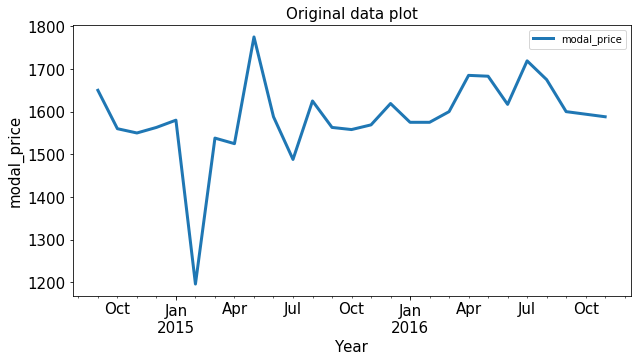

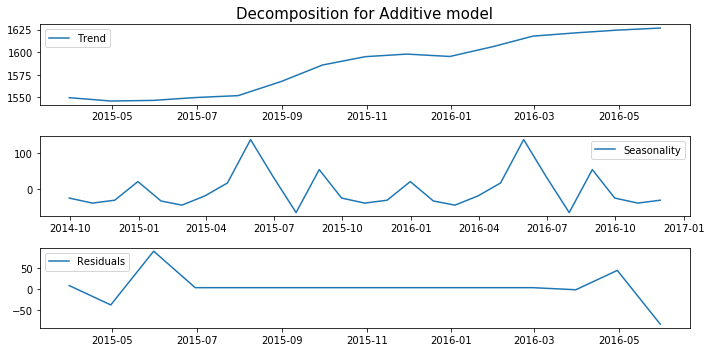

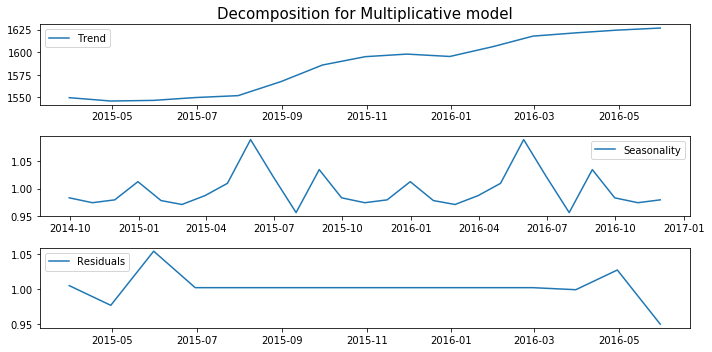

In [382]:
sea=check_seasonality(data=monthly_new, apmc='akole', comm='bajri', col='modal_price')

In [383]:
print(sea)

Multiplicative


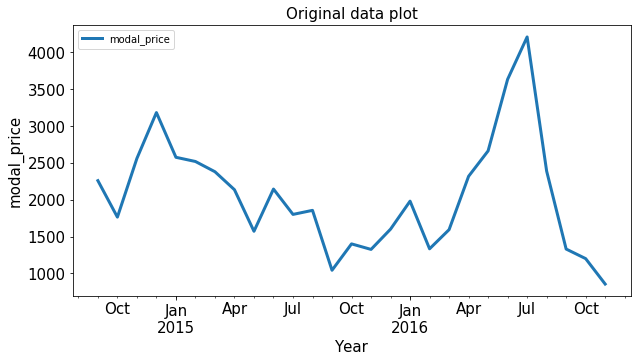

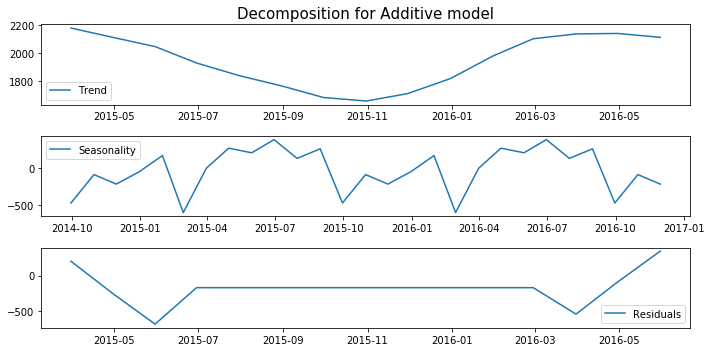

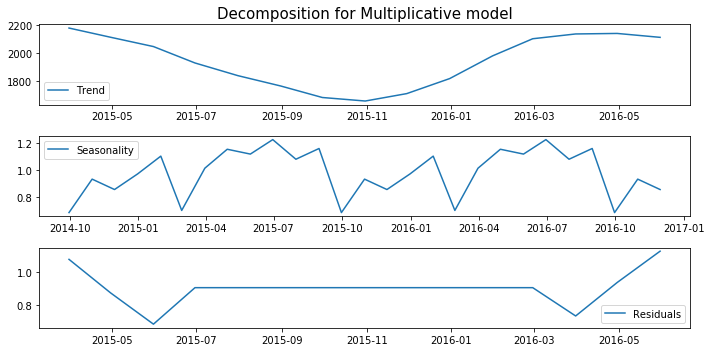

In [384]:
sea=check_seasonality(data=monthly_new, apmc='rahata', comm='capsicum', col='modal_price')

In [385]:
sea

'Multiplicative'

# Deseasonalising the data and storing it in csv

Deseasonalising Modal Price

In [389]:
apmcs = list(monthly_new["APMC"].unique())
for apmc in apmcs:
    df_apmc = monthly_new[monthly_new['APMC']==apmc]
    commodities=list(df_apmc["Commodity"].unique())
    for commodity in commodities:
        monthly_new=deseason(monthly_new, apmc=apmc, comm=commodity, col='modal_price')

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:475: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:349: RuntimeWarning: invalid value encountered in double_scalars
  xo = x - x.sum()/notmask_int.sum()


Deseasonalising Maximum price

In [391]:
apmcs = list(monthly_new["APMC"].unique())
for apmc in apmcs:
    df_apmc = monthly_new[monthly_new['APMC']==apmc]
    commodities=list(df_apmc["Commodity"].unique())
    for commodity in commodities:
        monthly_new=deseason(monthly_new, apmc=apmc, comm=commodity, col='max_price')

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:475: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:349: RuntimeWarning: invalid value encountered in double_scalars
  xo = x - x.sum()/notmask_int.sum()


Deseasonalising Minimum price

In [392]:
apmcs = list(monthly_new["APMC"].unique())
for apmc in apmcs:
    df_apmc = monthly_new[monthly_new['APMC']==apmc]
    commodities=list(df_apmc["Commodity"].unique())
    for commodity in commodities:
        monthly_new=deseason(monthly_new, apmc=apmc, comm=commodity, col='min_price')

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:475: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:349: RuntimeWarning: invalid value encountered in double_scalars
  xo = x - x.sum()/notmask_int.sum()


In [375]:
monthly_new

,APMC,Commodity,Month,Year,arrivals_in_qtl,combination_label,date,district_name,max_price,max_price_deseasonalized,max_price_seasonal_index,min_price,min_price_deseasonalized,min_price_seasonal_index,modal_price,modal_price_deseasonalized,modal_price_seasonal_index,state_name
2014-09-01,akole,bajri,September,2014,25,akole:bajri,2014-09-01,Ahmadnagar,1733,1755.180474,0.987363,1467,1460.668694,1.004335,1650,1677.744015,0.983463,Maharashtra
2014-10-01,akole,bajri,October,2014,30,akole:bajri,2014-10-01,Ahmadnagar,1700,1732.646109,0.981158,1390,1366.291947,1.017352,1560,1600.603803,0.974632,Maharashtra
2014-11-01,akole,bajri,November,2014,67,akole:bajri,2014-11-01,Ahmadnagar,1700,1695.761407,1.002500,1400,1415.591205,0.988986,1550,1581.999142,0.979773,Maharashtra
2014-12-01,akole,bajri,December,2014,40,akole:bajri,2014-12-01,Ahmadnagar,1750,1757.447546,0.995762,1375,1443.596710,0.952482,1563,1543.460612,1.012659,Maharashtra
2015-01-01,akole,bajri,January,2015,74,akole:bajri,2015-01-01,Ahmadnagar,1840,1862.598893,0.987867,1395,1392.007209,1.002150,1580,1614.727900,0.978493,Maharashtra
2015-02-01,akole,bajri,February,2015,4855,akole:bajri,2015-02-01,Ahmadnagar,1351,1407.154852,0.960093,1014,1015.124988,0.998892,1196,1231.198399,0.971411,Maharashtra
2015-03-01,akole,bajri,March,2015,144,akole:bajri,2015-03-01,Ahmadnagar,1750,1774.437492,0.986228,1375,1367.945398,1.005157,1538,1557.491665,0.987485,Maharashtra
2015-04-01,akole,bajri,April,2015,52,akole:bajri,2015-04-01,Ahmadnagar,1800,1767.194636,1.018564,1357,1347.171738,1.007295,1525,1510.408155,1.009661,Maharashtra
2015-05-01,akole,bajri,May,2015,9,akole:bajri,2015-05-01,Ahmadnagar,1900,1807.942912,1.050918,1375,1347.582812,1.020345,1775,1630.326531,1.088739,Maharashtra
2015-06-01,akole,bajri,June,2015,16,akole:bajri,2015-06-01,Ahmadnagar,1800,1772.221174,1.015675,1388,1354.581222,1.024671,1588,1553.117465,1.022460,Maharashtra


In [376]:
monthly_new.to_csv(r'G:/SocialCops/CMO_MSP_Mandi_Deseasonalized.csv', index=False)